<a href="https://colab.research.google.com/github/hygo2025/rna/blob/main/02-01-MPC-Atividade-especificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# üß†ü§ñ O Neur√¥nio de McCulloch-Pitts

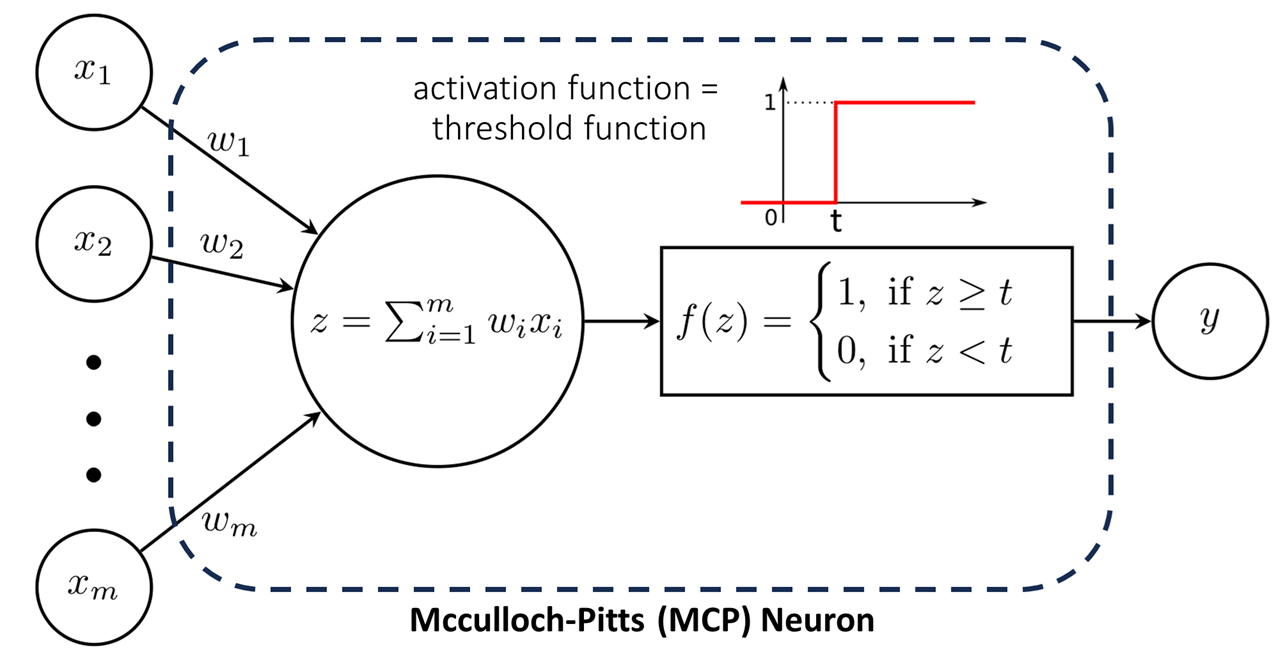

Figura 1: Neur√¥nio de McCulloch-Pitts


## Defini√ß√£o

O neur√¥nio de **McCulloch-Pitts (MCP)** (McCulloch and Pitts, 1943) foi o primeiro modelo matematico-computacional do neur√¥nio biol√≥gico.

Como ilustrado na Figura 1:

- Ele recebe $m$ valores de **entrada**, $\left[ x_1, x_2, ..., x_m \right]$ representando pulsos el√©tricos.
- Estes sinais s√£o multiplicados por $m$ **pesos**, $\left[ w_1, w_2, ..., w_m \right]$, que simulam a resist√™ncia el√©trica das sinapses e modificam a quantidade do sinal que atualmente chega ao corpo do neur√¥nio.
- Se a soma ponderada das entradas for maior que um **limiar**, diz-se que o neur√¥nio se ativou e a sa√≠da √© definida como $1$. Caso contr√°rio, a sa√≠da √© definida como $0$.
- A fun√ß√£o de limiar que gera a sa√≠da do neur√¥nio a partir da soma ponderada das entradas √© uma **fun√ß√£o de ativa√ß√£o**. Como veremos ao longo do curso, existem outros tipos de fun√ß√£o de ativa√ß√£o.
- Originalmente, os valores de entrada eram bin√°rios (0 ou 1) e os valores dos pesos eram -1 (sinapses inibit√≥rias), 0 ou 1 (sinapses excitat√≥rias).

**Importante**: O **limiar de ativa√ß√£o** √© tipicamente chamado de **bias** e representado pela letra $b$. Vamos adotar esta nota√ß√£o deste ponto em diante.

Matematicamente, a opera√ß√£o realizada pelo neur√¥nio MCP pode ser escrita como:

$$
y(x_1, \dots, x_d) =
\begin{cases}
1,\text{ se } \sum_{i=1}^{m} w_i x_i >= b \\
0, \text{ caso contr√°rio}
\end{cases}
$$


## Nomeclatura


Na √°rea de Redes Neurais, √© comum o uso de nomes diferentes para as mesmas coisas.

**Neur√¥nios artificiais**, por exemplo, tamb√©m s√£o chamados de:

- **Unidade (unit)**.
- **N√≥ (node)**.
- **C√©lula (cell)** ‚Äì mais comum em redes recorrentes.
- **Unidade de processamento (processing unit)**.


## Atividades

### Atividade 1: Implementa√ß√£o do Neur√¥nio de McCulloch-Pitts (MCP)

Implemente o construtor e o m√©todo forward na c√©lula abaixo.

- O construtor deve armazenar os pesos (lista de floats) e o bias (float) como atributos privados da classe.
- A fun√ß√£o forward deve receber um vetor de entrada x (lista de floats) e retornar o valor de sa√≠da do neur√¥nio (float, 0 ou 1). Adicione um assert para verificar se o tamanho da entrada √© igual o tamanho da lista de pesos.

**Importante**: mesmo se voc√™ j√° conhece a biblioteca numpy, utilize listas do python neste exerc√≠cio.

In [1]:
# resposta:

class MCPNeuron:
    """McCulloch-Pitts Neuron model

    Simulates a biologic neuron using a set of weights and
    an activation threshold.
    """

    def __init__(self, weights: list[float], bias: float):
        self._weights: list[float] = weights
        self._bias: float = bias

    def forward(self, x: list[float]) -> float:
        assert len(x) == len(self._weights), \
            f"O tamanho da entrada ({len(x)}) deve ser igual ao tamanho da lista de pesos ({len(self._weights)})."

        weighted_sum = 0.0
        for i in range(len(self._weights)):
            weighted_sum += self._weights[i] * x[i]

        if weighted_sum >= self._bias:
            return 1.0
        else:
            return 0.0

In [2]:
neuron = MCPNeuron(weights=[0.25, 0.5], bias=1)
neuron.forward([4, 0])  # resultado esperado = 1

1.0

### Atividade 2: Neur√¥nios MCP como Operadores L√≥gicos

C√≥digo de prepara√ß√£o da atividade (n√£o √© necess√°rio modificar).

In [3]:
import pandas as pd


def unary_truth_table(neuron: MCPNeuron):
    table = []
    for a in [0, 1]:
        table.append([a, neuron.forward([a])])
    return pd.DataFrame(table, columns='a result'.split())

def binary_truth_table(neuron: MCPNeuron):
    table = []
    for a in [0, 1]:
        for b in [0, 1]:
            table.append([a, b, neuron.forward([a, b])])
    return pd.DataFrame(table, columns='a b result'.split())



#### Atividade 2.1: Operador l√≥gico AND

Crie um neur√¥nio cujos pesos e bias implementem a fun√ß√£o AND.

In [4]:
# resposta:
neuron_and = MCPNeuron(weights=[1.0, 1.0], bias=2.0)


In [5]:

# print the truth table for the logical operator AND
binary_truth_table(neuron_and)

a  b  result
0  0  0     0.0
1  0  1     0.0
2  1  0     0.0
3  1  1     1.0

#### Atividade 2.2: Operador l√≥gico OR

Crie um neur√¥nio cujos pesos e bias implementem a fun√ß√£o OR.

In [6]:
# resposta:
neuron_or = MCPNeuron(weights=[1.0, 1.0], bias=1.0)

In [7]:
# print the truth table for the logical operator OR
binary_truth_table(neuron_or)

a  b  result
0  0  0     0.0
1  0  1     1.0
2  1  0     1.0
3  1  1     1.0

#### Atividade 2.3: Operador l√≥gico NOT

Crie um neur√¥nio cujos pesos e bias implementem a fun√ß√£o NOT.

In [8]:
# resposta:
neuron_not = MCPNeuron(weights=[-1.0], bias=.0)

In [9]:
# print the truth table for the logical operator NOT
unary_truth_table(neuron_not)

a  result
0  0     1.0
1  1     0.0

#### Operador L√≥gico XOR

Tente criar um neur√¥nio cujos pesos e bias implementem a fun√ß√£o XOR.

In [10]:
# resposta:
# N√£o √© poss√≠vel

#### Atividade 2.4: Operador And com n entradas

Use heran√ßa criar uma classe que herde de MCPNeuron e implemente a fun√ß√£o And com n entradas.

In [11]:
# resposta:

class GenericAnd(MCPNeuron):
    def __init__(self, n: int):
        if not isinstance(n, int) or n <= 0:
            raise ValueError("O n√∫mero de entradas 'n' deve ser um inteiro positivo.")
        super().__init__(([1.0] * n), float(n))



In [12]:
n = 5
generic_and = GenericAnd(n)
generic_and.forward([1, 1, 1, 1, 0])  # esperado: 0

0.0

## O limiar de ativa√ß√£o (bias) como uma Entrada

Podemos reescrever o crit√©rio de ativa√ß√£o do neur√¥nio de forma que o pulso seja produzido sempre que a energia acumulada no corpo do neur√¥nio for maior ou igual a 0. Para isto, vamos subtrair o valor do limiar dos dois lados da inequa√ß√£o:

$$
\sum_{i=1}^{m} w_i x_i >= b \implies \left[ \sum_{i=1}^{m} w_i x_i \right] - b >= 0
$$


Historicamente, alguns autores utilizam  $-b$ como o peso associado √† uma entrada especial que √© sempre $1$. Ao fazer isto, o limiar se torna um peso como os demais e o crit√©rio de ativa√ß√£o se torna:

$$
\sum_{i=0}^{m} w_i x_i >= 0, \text { onde } x_0 = 1 \text{ e } w_0 = -b
$$

Por isto, algumas figuras como a Figura 2, trazem o limiar como uma entrada especial do neur√¥nio.



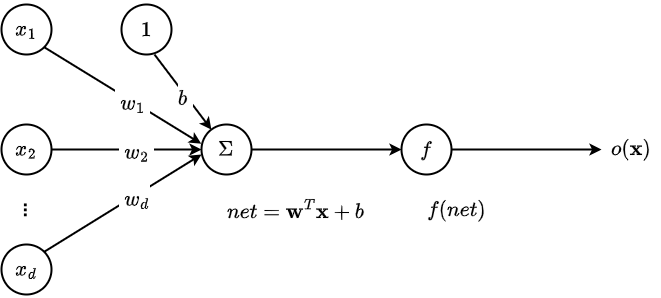

Figura 2: Neur√¥nio MCP com Limiar (*bias*) sendo utilizado como peso associado √† uma entrada com valor 1.

## Entradas e Pesos como Vetores

A **entrada** do neur√¥nio MCP pode ser vista como um ponto ou vetor de n√∫meros reais:
  
$$
\mathbf{x} = \begin{bmatrix} x_1\\ \vdots\\ x_d \end{bmatrix}.
$$

Da mesma forma, os **pesos** tamb√©m podem ser organizados em um vetor:

$$
\mathbf{w} = \begin{bmatrix} w_1\\ \vdots\\ w_d \end{bmatrix}.
$$

Observe que a soma ponderada das entradas equivale ao produto escalar (produto interno no espa√ßo Euclidiano) entre estes vetores.

$$
\mathbf{w} \cdot \mathbf{x} = \sum_{i=1}^{m} w_i x_i
$$

Como o valor do limiar √© escolhido pelo usu√°rio, o sinal da opera√ß√£o (soma ou subtra√ß√£o) n√£o √© relevante. A express√£o $a-b$ com $b=10$ √© equivalente √† opera√ß√£o $a+b$ com $b=-10$. A conven√ß√£o da literatura √© utilizar a opera√ß√£o de soma. Assim, utilizando a nota√ß√£o matricial, a opera√ß√£o realizada pelo neur√¥nio pode ser reescrita como:

$$
y(\mathbf{x}) =
\begin{cases}
1,\text{ se } \mathbf{w}^T \mathbf{x} + b >= 0 \\
0, \text{ caso contr√°rio}
\end{cases}
$$

Esta representa√ß√£o √© a que ser√° encontrada com mais frequ√™ncia em livros de redes neurais.


## O Neur√¥nio MCP como um Classificador

Apesar de simples, o neur√¥nio MCP pode ser visto como um classificador.

Para mostrar como isso pode ser feito, vamos utilizar um conjunto de dados de exemplo apresentado abaixo.

O conjunto de dados √© composto por um conjunto pontos com coordenadas $(x_1, x_2)$, cada um podendo ser ou da classe $0$ ou da classe $1$.

In [13]:

import numpy as np
import pandas as pd

df = pd.DataFrame([[3.5, 4.25, 1],
     [4, 3, 1],
     [4, 4, 1],
     [4.5, 1.75, 1],
     [4.9, 4.5, 1],
     [5, 4, 1],
     [5.5, 2.5, 1],
     [5.5, 3.5, 1],
     [0.5, 1.5, 0],
     [1, 2.5, 0],
     [1.25, 0.5, 0],
     [1.5, 1.5, 0],
     [2, 2, 0],
     [2.5, 0.75, 0]], columns = 'x1 x2 Classe'.split())

df

x1    x2  Classe
0   3.50  4.25       1
1   4.00  3.00       1
2   4.00  4.00       1
3   4.50  1.75       1
4   4.90  4.50       1
5   5.00  4.00       1
6   5.50  2.50       1
7   5.50  3.50       1
8   0.50  1.50       0
9   1.00  2.50       0
10  1.25  0.50       0
11  1.50  1.50       0
12  2.00  2.00       0
13  2.50  0.75       0

Os elementos do conjunto de dados e as respectivas classes podem ser visualizados na Figura abaixo.

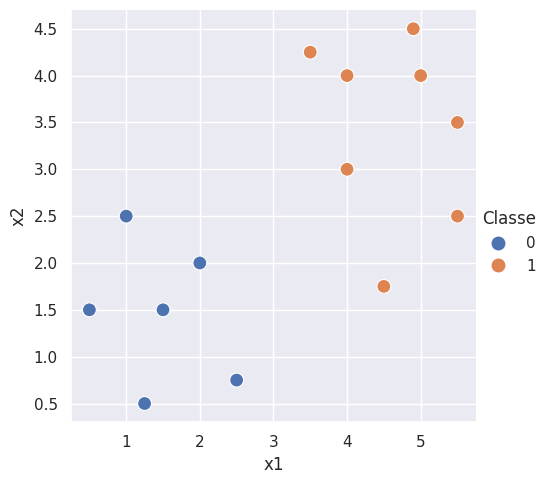

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.relplot(data = df, x = 'x1', y = 'x2', hue = 'Classe', s = 100); # o ponto e v√≠rgulo previne a gera√ß√£o de outputs

Considere que as coordenadas dos pontos ser√£o utilizadas como entrada para o neur√¥nio MCP.

Vamos definir os par√¢metros do neur√¥nio como $\mathbf{w} = [ 2.9, 1.0 ]$ e $b = 10$.

**Lembrete**: Na nossa implementa√ß√£o, b √© utilizado como um limiar de ativa√ß√£o, isto √©, a sa√≠da ser√° $1$ se a soma ponderada das entradas for maior que $10$.

Abaixo, criamos um neur√¥nio para atuar como classificador e o utilizamos para predizer as classes de todos os elementos do conjunto de dados. As classes preditss foram adicionadas ao ``DataFrame`` original dos dados. Como pode ser observado, o neur√¥nio foi capaz de classificar corretamente todos elementos do conjunto de dados.

In [15]:
classifier = MCPNeuron(weights=[2.9, 1.0], bias=10)

y_pred = [classifier.forward(x) for x in df[['x1', 'x2']].values]
df['Classe Predita'] = y_pred
df

x1    x2  Classe  Classe Predita
0   3.50  4.25       1             1.0
1   4.00  3.00       1             1.0
2   4.00  4.00       1             1.0
3   4.50  1.75       1             1.0
4   4.90  4.50       1             1.0
5   5.00  4.00       1             1.0
6   5.50  2.50       1             1.0
7   5.50  3.50       1             1.0
8   0.50  1.50       0             0.0
9   1.00  2.50       0             0.0
10  1.25  0.50       0             0.0
11  1.50  1.50       0             0.0
12  2.00  2.00       0             0.0
13  2.50  0.75       0             0.0

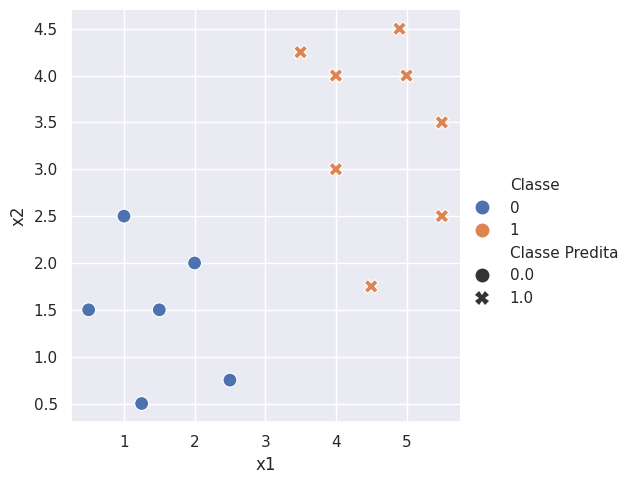

In [16]:
#@title
sns.relplot(data = df, x = 'x1', y = 'x2', hue = 'Classe', style = 'Classe Predita', s = 100);

## Atividade: Avaliando a Performance do Classificador usando a Acur√°cia

Implemente uma fun√ß√£o para calcular a acur√°cia. Esta m√©trica √© dada pelo percentual de amostras classificadas corretamente. Ela √© obtida dividindo o n√∫mero de itens em que a classe predita √© igual √† esperada pelo n√∫mero total de amostras.

Adicione asserts para verificar se os tamanhos das listas de entrada s√£o iguais e se estes tamanhos s√£o maiores que zero.

In [17]:
# resposta:
def accuracy_metric(expected: list, predicted: list) -> float:
    assert len(expected) == len(predicted), \
        "As listas 'expected' e 'predicted' devem ter o mesmo tamanho."

    n = len(expected)
    assert n > 0, \
        "As listas de entrada n√£o podem estar vazias (tamanho deve ser maior que zero)."

    correct_predictions = 0
    for i in range(n):
        if expected[i] == predicted[i]:
            correct_predictions += 1

    return correct_predictions / n

In [18]:
expected = df['Classe'].values
predicted = df['Classe Predita'].values

accuracy_metric(expected, predicted)

1.0

## O Neur√¥nio MCP √© capaz de Resolver apenas Problemas Linearmente Separ√°veis

A Figura a seguir apresenta as regi√µes de decis√£o do classificador. Qualquer elemento/ponto que esteja na √°rea azul claro ser√° classificado como pertencente √† classe $0$. Analogamente, pontos na regi√£o vermelho claro ser√£o classificados como sendo da classe $1$.

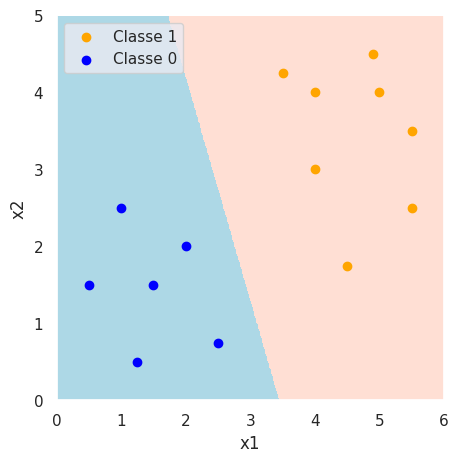

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def draw_classification_region(data: pd.DataFrame, classifier: MCPNeuron):
    cmap_light = ListedColormap(['#ADD8E6', '#AAFFAA', '#ffdfd4'])

    h = .01

    x_min = data['x1'].min() - 0.5
    x_max = data['x1'].max() + 0.5
    y_min = data['x2'].min() - 0.5
    y_max = data['x2'].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    f, axs = plt.subplots(1, 1, figsize=(5, 5))

    Z = np.array([classifier.forward([x1, x2]) for x1, x2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    axs.pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')

    axs.scatter(df[df['Classe'] == 1]['x1'], df[df['Classe'] == 1]['x2'], color = 'orange', label = 'Classe 1')
    axs.scatter(df[df['Classe'] == 0]['x1'], df[df['Classe'] == 0]['x2'], color = 'blue', label = 'Classe 0')

    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.xlim((x_min, x_max))
    plt.ylim((y_min, y_max))
    plt.legend(loc = 'best');


draw_classification_region(df, classifier)


Como pode ser visto, o neur√¥nio MCP √© um classificador linear, ou seja, as regi√µes de decis√£o s√£o delimitadas por uma fun√ß√£o linear.

Isto faz sentido quando observamos que $\mathbf{w}^T \mathbf{x} + b$ lembra a f√≥rmula utilizada para representar hiperplanos (retas em 2D, planos em 3D, etc.). Em particular, o hiperplano definido por $\mathbf{w}^T \mathbf{x} + b = 0$ √© a fronteira de decis√£o do classificador (a reta de separa√ß√£o na figura acima). Analisando a opera√ß√£o do neur√¥nio como uma opera√ß√£o linear, percebemos que o vetor $\mathbf{w}$ define a inclina√ß√£o do hiperplano e $b$ define o deslocamento do hiperplano em rela√ß√£o √† origem.

Conclu√≠mos, assim, que **o neur√¥nio MCP √© capaz de resolver bem apenas problemas linearmente separ√°veis**, isto √©, aqueles em que a maioria dos dados de classes diferentes podem ser separados por um hiperplano. Infelizmente, a maioria dos problemas interessantes n√£o s√£o linearmente separ√°veis e redes neurais mais complexas s√£o necess√°rias para atacar estes problemas.





### Exemplo Ilustrativo

Para ilustrar esta limita√ß√£o, o conjunto de dados abaixo simula uma vers√£o *soft* da porta l√≥gica `XOR` em que valores pr√≥ximos a $(0, 0)$ e $(1, 1)$ devem receber valor $0$ e valores pr√≥ximos a $(0, 1)$ ou $(1, 0)$ devem receber valor $1$.


In [20]:
#@title

import numpy as np
import pandas as pd

df = pd.DataFrame(
    [[0.84, 0.67, 0],
     [0.67, 0.84, 0],
     [1.00, 1.00, 0],
     [0.17, 0.33, 0],
     [0.33, 0.17, 0],
     [0.00, 0.00, 0],
     [0.84, 0.33, 1],
     [0.67, 0.17, 1],
     [1.00, 0.00, 1],
     [0.17, 0.67, 1],
     [0.33, 0.84, 1],
     [0.00, 1.00, 1]], columns = 'x1 x2 Classe'.split())

df

x1    x2  Classe
0   0.84  0.67       0
1   0.67  0.84       0
2   1.00  1.00       0
3   0.17  0.33       0
4   0.33  0.17       0
5   0.00  0.00       0
6   0.84  0.33       1
7   0.67  0.17       1
8   1.00  0.00       1
9   0.17  0.67       1
10  0.33  0.84       1
11  0.00  1.00       1

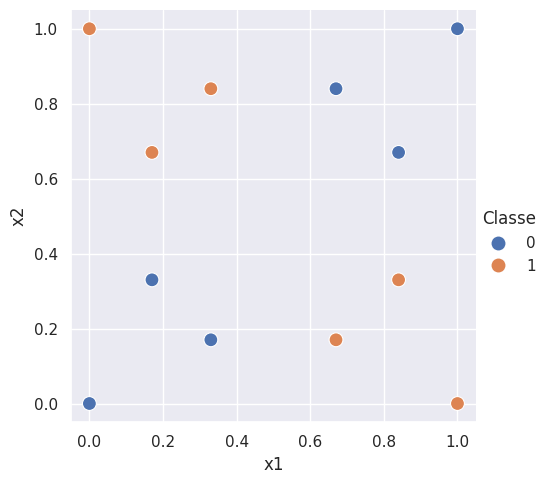

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.relplot(data = df, x = 'x1', y = 'x2', hue = 'Classe', s = 100);

Veja que elementos do primeiro e terceiro quadrantes (onde $x_1$ e $x_2$ possuem o mesmo sinal) pertencem √† classe $1$. J√° os elementos dos quadrantes dois e quatro (onde $x_1$ e $x_2$ possuem sinais opostos) pertencem √† classe $0$. Apesar de ter um padr√£o claro e simples, n√£o √© poss√≠vel discriminar os pontos de acordo com as duas classes utilizando um neur√¥nio MCP.

Fa√ßa o teste! Tente encontrar uma reta que permita separar os pontos de classes diferentes em duas regi√µes do espa√ßo.


### Visualiza√ß√£o do Hiperplano de Decis√£o

A c√©lula abaixo demonstra como visualizar o plano definido pelos par√¢metros do neur√¥nio MCP.

Para ganhar intui√ß√£o geom√©trica dos efeitos de modificar os par√¢metros do neur√¥nio, brinque com os valores na √∫ltima linha e execute a c√©lula novamente para verificar o efeito no plano.


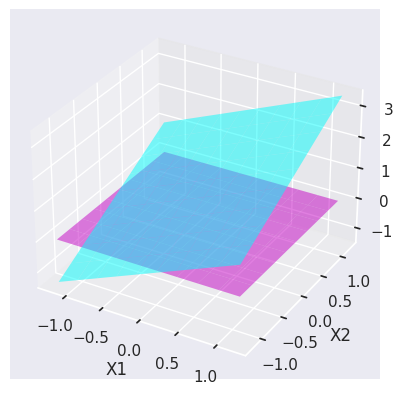

In [22]:
import numpy as np
import matplotlib.pyplot as plt


def plot_plane(w1, w2, bias, x1_range=(-1.2, 1.2), x2_range=(-1.2, 1.2)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create grid
    x1 = np.linspace(*x1_range, 10)
    x2 = np.linspace(*x2_range, 10)
    X1, X2 = np.meshgrid(x1, x2)
    Z = w1 * X1 + w2 * X2 + bias
    Z2 = 0 * X1 + 0 * X2 + 0

    # Plot the surface
    ax.plot_surface(X1, X2, Z, alpha=0.5, rstride=1,
                    cstride=1, color='cyan', edgecolor='none')
    ax.plot_surface(X1, X2, Z2, alpha=0.5, rstride=1,
                    cstride=1, color='magenta', edgecolor='none')

    # Set labels
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Z')

    plt.show()

# Modifique os valores abaixo e verifique como o plano √© afetado
plot_plane(w1=1, w2=1, bias=1)

## Atividade: "Treinando" o Classificador Manualmente

Crie um objeto do tipo MCPNeuron no local indicado e inicialize pesos e bias de forma a maximizar a performance do classificador.

O treinamento do modelo √© o ajuste dos par√¢metros (pesos e bias). Neste exemplo, estamos fazendo isto manualmente e nas pr√≥ximas aulas aprenderemos como fazer isto automaticamente.

A c√©lula abaixo cria uma base de dados, classifica as amostras, desenha a regi√£o de classifica√ß√£o e mostra a acur√°cia na tela.

>> Accuracy:  0.81


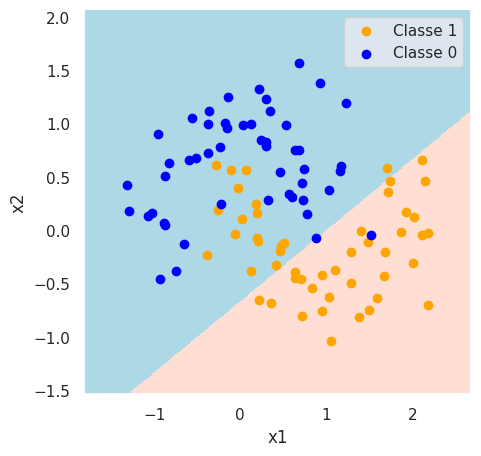

In [41]:
# resposta:

# imports
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

# cria o dataset
x, y = make_moons(noise=0.3, random_state=0)
data = np.concat([x, np.expand_dims(y, axis=1)], axis=1)
df = pd.DataFrame(data, columns = 'x1 x2 Classe'.split())

# define o classificador

##########################
# ADICIONE A RESPOSTA ABAIXO
##########################
classifier = MCPNeuron(weights=[1.0, -1.5], bias=1.0)

# desenha as regicoes de classificacao
draw_classification_region(df, classifier)

# calcula a metrica
predicted = [classifier.forward(sample) for sample in x]
print(">> Accuracy: ", accuracy_metric(expected=y, predicted=predicted))

## Refer√™ncias

- Machine Learning, Tom Mitchell, McGraw Hill, 1997.

- McCulloch and Pitts: A logical calculus of the ideas immanent in nervous activity. Bulletin of Mathematical Biophysics, 1943.

- Rosenblatt: The perceptron - a probabilistic model for information storage and organization in the brain. Psychological Review, 1958.

- Minsky and Papert: Perceptrons: An introduction to computational geometry. MIT Press, 1969.

- Mohammed J. Zaki, Wagner Meira, Jr., Data Mining and Machine Learning: Fundamental Concepts and Algorithms, 2nd Edition, Cambridge University Press, March 2020.